# WeatherPy

## Generate Random Geographic Coordinates and List of Cities

In [78]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")
cities


Number of cities in the list: 612


['jamestown',
 'zhezkazgan',
 'sur',
 'albany',
 'castro',
 'miraflores',
 'atar',
 'taolanaro',
 'itoman',
 'busselton',
 'itarema',
 'tall kayf',
 'tiksi',
 'chuy',
 'avera',
 'cabedelo',
 'hamilton',
 'leh',
 'rikitea',
 'bolu',
 'umm ruwabah',
 'znamenskoye',
 'bluff',
 'carnarvon',
 'batagay-alyta',
 'hermanus',
 'nyurba',
 'clyde river',
 'saint-philippe',
 'tevaitoa',
 'klaksvik',
 'msanga',
 'alta floresta',
 'punta arenas',
 'bredasdorp',
 'praia',
 'east london',
 'puerto ayora',
 'hithadhoo',
 'cayenne',
 'george',
 'grand river south east',
 'hobart',
 'cape town',
 'hilo',
 'saskylakh',
 'souillac',
 'kununurra',
 'geraldton',
 'camana',
 'severo-kurilsk',
 'khomutovka',
 'tecoanapa',
 'havre',
 'correntina',
 'kuusankoski',
 'chaykovskaya',
 'alice springs',
 'upernavik',
 'port elizabeth',
 'barentsburg',
 'atuona',
 'barrow',
 'arraial do cabo',
 'fortuna',
 'labuhan',
 'senneterre',
 'merauke',
 'khatanga',
 'ushuaia',
 'roma',
 'canutama',
 'qaanaaq',
 'airai',
 'port

## Showcase the Relationship Between Weather Variables and Latitude

In [3]:
# Set the API base URL and units
url = 'https://api.openweathermap.org/data/2.5/weather?'
units = "imperial"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={units}&q="
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url + city).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | jamestown
Processing Record 2 of Set 1 | zhezkazgan
Processing Record 3 of Set 1 | sur
Processing Record 4 of Set 1 | albany
Processing Record 5 of Set 1 | castro
Processing Record 6 of Set 1 | miraflores
Processing Record 7 of Set 1 | atar
Processing Record 8 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 9 of Set 1 | itoman
Processing Record 10 of Set 1 | busselton
Processing Record 11 of Set 1 | itarema
Processing Record 12 of Set 1 | tall kayf
Processing Record 13 of Set 1 | tiksi
Processing Record 14 of Set 1 | chuy
Processing Record 15 of Set 1 | avera
Processing Record 16 of Set 1 | cabedelo
Processing Record 17 of Set 1 | hamilton
Processing Record 18 of Set 1 | leh
Processing Record 19 of Set 1 | rikitea
Processing Record 20 of Set 1 | bolu
Processing Record 21 of Set 1 | umm ruwabah
City not found. Skipping...
Processing Record 22 of Set 1 | znamenskoye
Processing Re

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          562
Lat           562
Lng           562
Max Temp      562
Humidity      562
Cloudiness    562
Wind Speed    562
Country       562
Date          562
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,jamestown,42.0970,-79.2353,65.84,59,0,10.36,US,1667510806
1,zhezkazgan,47.8043,67.7144,43.23,46,100,13.89,KZ,1667511030
2,sur,22.5667,59.5289,77.67,49,0,10.87,OM,1667511031
3,albany,42.6001,-73.9662,65.62,51,0,4.61,US,1667510301
4,castro,-24.7911,-50.0119,52.61,78,63,6.98,BR,1667511031


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,jamestown,42.0970,-79.2353,65.84,59,0,10.36,US,1667510806
1,zhezkazgan,47.8043,67.7144,43.23,46,100,13.89,KZ,1667511030
2,sur,22.5667,59.5289,77.67,49,0,10.87,OM,1667511031
3,albany,42.6001,-73.9662,65.62,51,0,4.61,US,1667510301
4,castro,-24.7911,-50.0119,52.61,78,63,6.98,BR,1667511031


## Scatter Plots:
### Latitude vs. Temperature

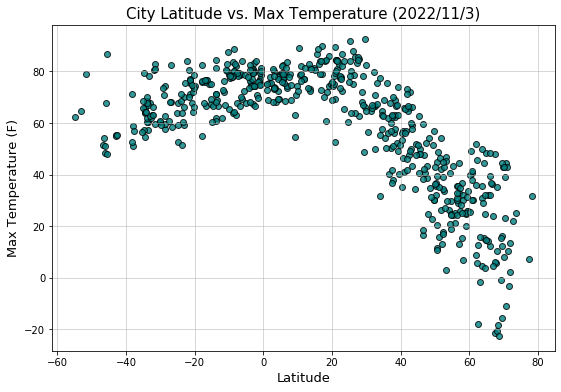

In [36]:
# Build scatter plot for latitude vs. temperature
lat = city_data_df["Lat"]
temp = city_data_df["Max Temp"]

plt.figure(figsize=(9,6))
plt.scatter(lat, temp, marker="o", facecolors="teal",
             alpha=0.80, edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (2022/11/3)", fontsize="15")
plt.xlabel("Latitude", fontsize=13)
plt.ylabel("Max Temperature (F)", fontsize=13)
plt.grid(linestyle="-", linewidth=1, alpha=0.5)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

### Latitude vs. Humidity

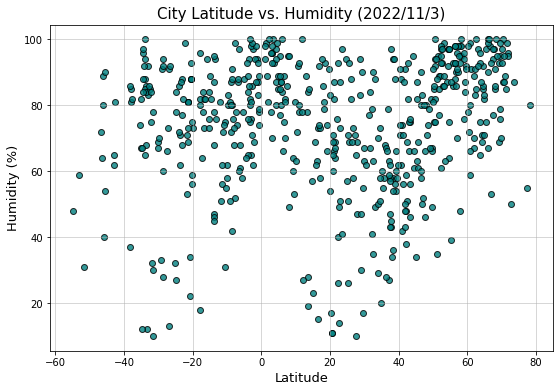

In [32]:
# Build scatter plot for latitude vs. humidity
lat = city_data_df["Lat"]
humidity = city_data_df["Humidity"]

plt.figure(figsize=(9,6))
plt.scatter(lat, humidity, marker="o", facecolors="teal",
             alpha=0.80, edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2022/11/3)", fontsize="15")
plt.xlabel("Latitude", fontsize=13)
plt.ylabel("Humidity (%)", fontsize=13)
plt.grid(linestyle="-", linewidth=1, alpha=0.5)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

### Latitude vs. Cloudiness

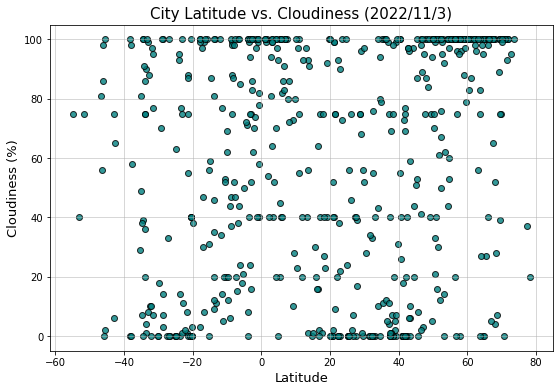

In [33]:
# Build scatter plot for latitude vs. cloudiness
lat = city_data_df["Lat"]
cloudiness = city_data_df["Cloudiness"]

plt.figure(figsize=(9,6))
plt.scatter(lat, cloudiness, marker="o", facecolors="teal",
             alpha=0.80, edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2022/11/3)", fontsize="15")
plt.xlabel("Latitude", fontsize=13)
plt.ylabel("Cloudiness (%)", fontsize=13)
plt.grid(linestyle="-", linewidth=1, alpha=0.5)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

### Latitude vs. Wind Speed

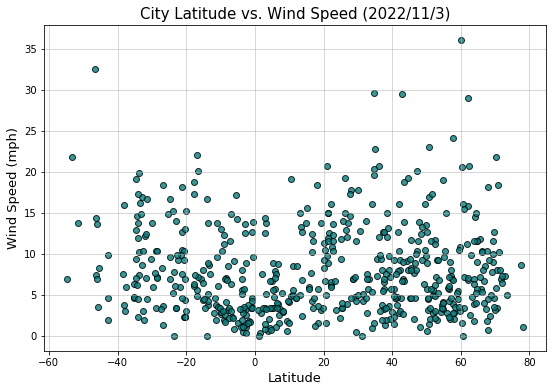

In [34]:
# Build scatter plot for latitude vs. Wind Speed
lat = city_data_df["Lat"]
wind = city_data_df["Wind Speed"]

plt.figure(figsize=(9,6))
plt.scatter(lat, wind, marker="o", facecolors="teal",
             alpha=0.80, edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2022/11/3)", fontsize="15")
plt.xlabel("Latitude", fontsize=13)
plt.ylabel("Wind Speed (mph)", fontsize=13)
plt.grid(linestyle="-", linewidth=1, alpha=0.5)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

## Linear Regression for Each Relationship

In [126]:
# Define a function to create Linear Regression plots
def linear_regression(x,y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    print(f"The r-squared is : {st.pearsonr(x, y)[0]}")
    # print(f"The r-squared is: {rvalue**2}")
    plt.scatter(x,y)
    plt.plot(x,regress_values,"r-")
    return line_eq

def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")

In [30]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,jamestown,42.0970,-79.2353,65.84,59,0,10.36,US,1667510806
1,zhezkazgan,47.8043,67.7144,43.23,46,100,13.89,KZ,1667511030
2,sur,22.5667,59.5289,77.67,49,0,10.87,OM,1667511031
3,albany,42.6001,-73.9662,65.62,51,0,4.61,US,1667510301
5,miraflores,19.2167,-98.8083,74.16,66,92,3.20,MX,1667511032


In [31]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,castro,-24.7911,-50.0119,52.61,78,63,6.98,BR,1667511031
8,busselton,-33.6500,115.3333,57.16,86,4,7.38,AU,1667511032
9,itarema,-2.9248,-39.9167,79.25,76,16,12.53,BR,1667511034
12,chuy,-33.6971,-53.4616,60.55,68,1,10.22,UY,1667510790
14,cabedelo,-6.9811,-34.8339,79.47,74,15,14.90,BR,1667510751


### Latitude vs. Temperature Linear Regression Plot

The r-squared is : -0.8403543756576703


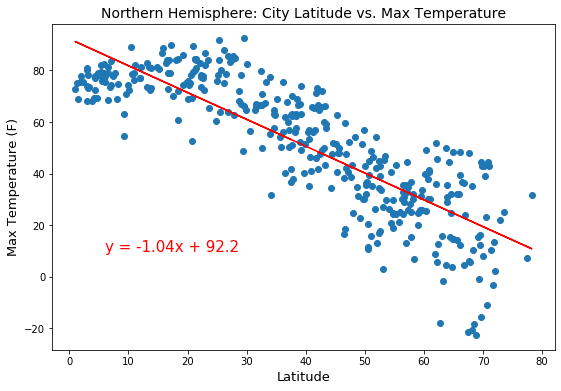

In [127]:
# Linear regression on Northern Hemisphere
plt.figure(figsize=(9,6))
eq = linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])
annotate(eq, 6, 10)
plt.xlabel("Latitude", fontsize=13)
plt.ylabel("Max Temperature (F)", fontsize=13)
plt.title("Northern Hemisphere: City Latitude vs. Max Temperature", fontsize=14)
plt.show()

#### There is a strong negative correlation between a city latitude and the max temperature in the Northern Hemisphere.

The r-squared is : 0.579515937801958


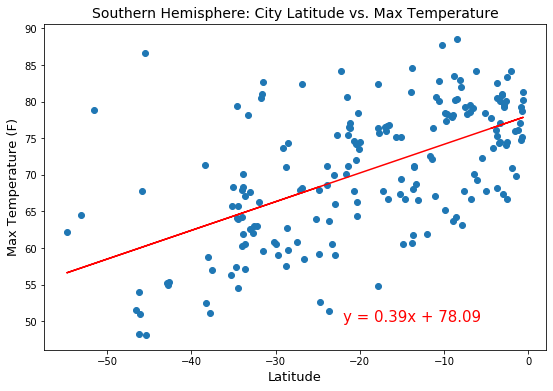

In [117]:
# Linear regression on Southern Hemisphere
plt.figure(figsize=(9,6))
eq = linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])
annotate(eq, -22, 50)
plt.xlabel("Latitude", fontsize=13)
plt.ylabel("Max Temperature (F)", fontsize=13)
plt.title("Southern Hemisphere: City Latitude vs. Max Temperature", fontsize=14)
plt.show()

#### There is a moderate positive correlation between a city latitude and the max temperature in the Southern Hemisphere.

### Latitude vs. Humidity Linear Regression Plot

The r-squared is : 0.19692040561335816


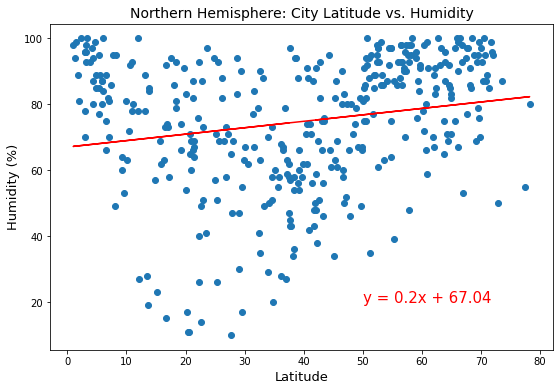

In [118]:
# Linear regression on Northern Hemisphere
plt.figure(figsize=(9,6))
eq = linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])
annotate(eq, 50, 20)
plt.xlabel("Latitude", fontsize=13)
plt.ylabel("Humidity (%)", fontsize=13)
plt.title("Northern Hemisphere: City Latitude vs. Humidity", fontsize=14)
plt.show()

#### There is no correlation between a city latitude and the humidity in the Northern Hemisphere.

The r-squared is : 0.20675636848651457


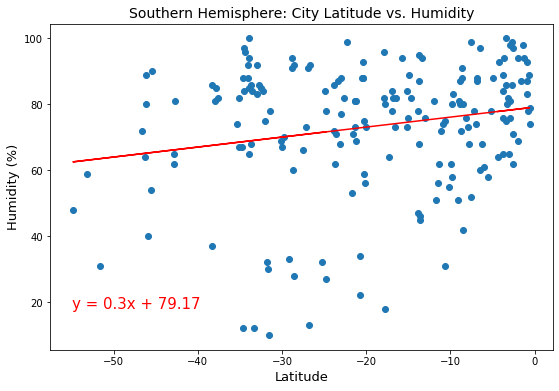

In [119]:
# Linear regression on Southern Hemisphere
plt.figure(figsize=(9,6))
eq = linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])
annotate(eq, -55, 18)
plt.xlabel("Latitude", fontsize=13)
plt.ylabel("Humidity (%)", fontsize=13)
plt.title("Southern Hemisphere: City Latitude vs. Humidity", fontsize=14)
plt.show()

#### There is a very weak positive correlation between a city latitude and the max temperature in the Southern Hemisphere.

### Latitude vs. Cloudiness Linear Regression Plot

The r-squared is : 0.2042635424131925


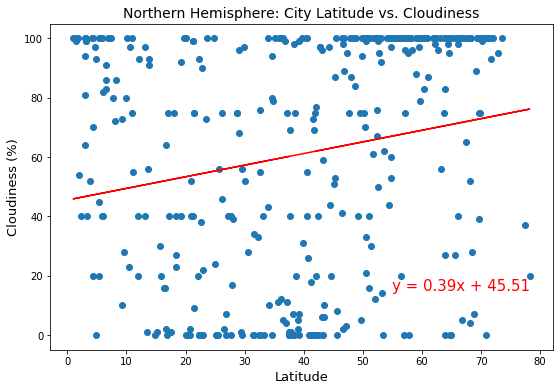

In [120]:
# Linear regression on Northern Hemisphere
plt.figure(figsize=(9,6))
eq = linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])
annotate(eq, 55, 15)
plt.xlabel("Latitude", fontsize=13)
plt.ylabel("Cloudiness (%)", fontsize=13)
plt.title("Northern Hemisphere: City Latitude vs. Cloudiness", fontsize=14)
plt.show()

#### There is no correlation between a city latitude and cloudiness in the Northern Hemisphere.

The r-squared is : 0.14683884541655157


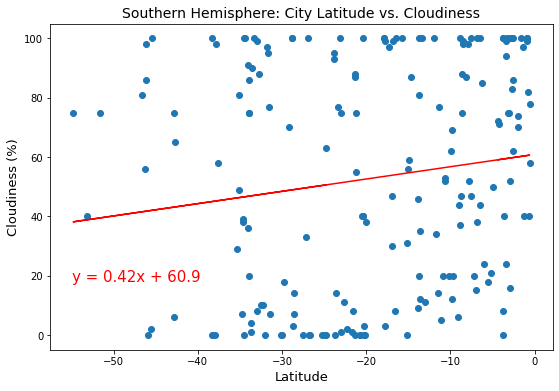

In [121]:
# Linear regression on Southern Hemisphere
plt.figure(figsize=(9,6))
eq = linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])
annotate(eq, -55, 18)
plt.xlabel("Latitude", fontsize=13)
plt.ylabel("Cloudiness (%)", fontsize=13)
plt.title("Southern Hemisphere: City Latitude vs. Cloudiness", fontsize=14)
plt.show()

#### There is no correlation between a city latitude and cloudiness in the Southern Hemisphere.

### Latitude vs. Wind Speed Linear Regression Plot

The r-squared is : 0.10405754017765592


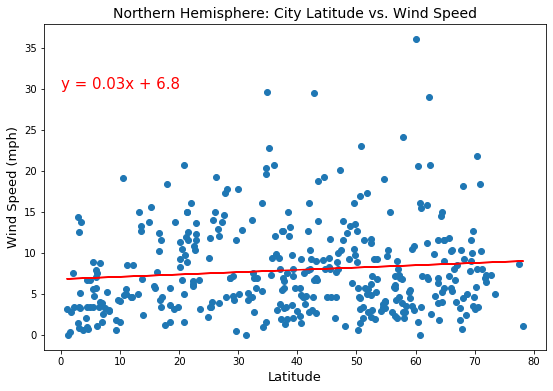

In [122]:
# Linear regression on Northern Hemisphere
plt.figure(figsize=(9,6))
eq = linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])
annotate(eq, 0, 30)
plt.xlabel("Latitude", fontsize=13)
plt.ylabel("Wind Speed (mph)", fontsize=13)
plt.title("Northern Hemisphere: City Latitude vs. Wind Speed", fontsize=14)
plt.show()

#### There is no correlation between a city latitude and wind speed in the Northern Hemisphere.

The r-squared is : -0.3409941752509496


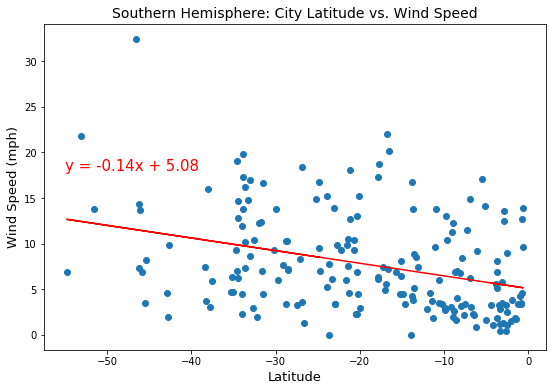

In [123]:
# Linear regression on Southern Hemisphere
plt.figure(figsize=(9,6))
eq = linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])
annotate(eq, -55, 18)
plt.xlabel("Latitude", fontsize=13)
plt.ylabel("Wind Speed (mph)", fontsize=13)
plt.title("Southern Hemisphere: City Latitude vs. Wind Speed", fontsize=14)
plt.show()

#### There is weak negative correlation between a city latitude and wind speed in the Southern Hemisphere.